In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

## Analyse du syndrome de l'incidence grippal

In [42]:
data = pd.read_csv("https://www.sentiweb.fr/datasets/all/inc-3-PAY.csv",skiprows=1)
data

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
0,202440,3,91353,81318.0,101388.0,137,122.0,152.0,FR,France
1,202439,3,92158,83396.0,100920.0,138,125.0,151.0,FR,France
2,202438,3,91786,82903.0,100669.0,138,125.0,151.0,FR,France
3,202437,3,56460,49319.0,63601.0,85,74.0,96.0,FR,France
4,202436,3,33657,27906.0,39408.0,50,41.0,59.0,FR,France
...,...,...,...,...,...,...,...,...,...,...
2079,198448,3,78620,60634.0,96606.0,143,110.0,176.0,FR,France
2080,198447,3,72029,54274.0,89784.0,131,99.0,163.0,FR,France
2081,198446,3,87330,67686.0,106974.0,159,123.0,195.0,FR,France
2082,198445,3,135223,101414.0,169032.0,246,184.0,308.0,FR,France


In [43]:
lignes = data[data.isna().any(axis=1)]
lignes

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
1847,198919,3,-,NaN,NaN,-,NaN,NaN,FR,France


Nous supprimons cette ligne qui contient pas de données valables

In [47]:
data_clean = data.dropna().copy()
data_clean

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
0,202440,3,91353,81318.0,101388.0,137,122.0,152.0,FR,France
1,202439,3,92158,83396.0,100920.0,138,125.0,151.0,FR,France
2,202438,3,91786,82903.0,100669.0,138,125.0,151.0,FR,France
3,202437,3,56460,49319.0,63601.0,85,74.0,96.0,FR,France
4,202436,3,33657,27906.0,39408.0,50,41.0,59.0,FR,France
...,...,...,...,...,...,...,...,...,...,...
2079,198448,3,78620,60634.0,96606.0,143,110.0,176.0,FR,France
2080,198447,3,72029,54274.0,89784.0,131,99.0,163.0,FR,France
2081,198446,3,87330,67686.0,106974.0,159,123.0,195.0,FR,France
2082,198445,3,135223,101414.0,169032.0,246,184.0,308.0,FR,France


Nous devons avoir la colonne inc comme une colonne des entiers <span style="color:blue;">int </span> donc il faut transformer pour arriver a ce niveau

In [55]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    iso = isoweek.Week(year,week)
    return pd.Period(iso.day(0), 'W') # Period de padas s'attend a trouver une date et une longueur pour définir la période


Nous définnissons la nouvelle colonne Period

In [62]:
data_clean['Period'] = [convert_week(x) for x in data_clean['week']]
data_clean

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name,Period
0,202440,3,91353,81318.0,101388.0,137,122.0,152.0,FR,France,2024-09-30/2024-10-06
1,202439,3,92158,83396.0,100920.0,138,125.0,151.0,FR,France,2024-09-23/2024-09-29
2,202438,3,91786,82903.0,100669.0,138,125.0,151.0,FR,France,2024-09-16/2024-09-22
3,202437,3,56460,49319.0,63601.0,85,74.0,96.0,FR,France,2024-09-09/2024-09-15
4,202436,3,33657,27906.0,39408.0,50,41.0,59.0,FR,France,2024-09-02/2024-09-08
...,...,...,...,...,...,...,...,...,...,...,...
2079,198448,3,78620,60634.0,96606.0,143,110.0,176.0,FR,France,1984-11-26/1984-12-02
2080,198447,3,72029,54274.0,89784.0,131,99.0,163.0,FR,France,1984-11-19/1984-11-25
2081,198446,3,87330,67686.0,106974.0,159,123.0,195.0,FR,France,1984-11-12/1984-11-18
2082,198445,3,135223,101414.0,169032.0,246,184.0,308.0,FR,France,1984-11-05/1984-11-11


Trions les données et mettons les en ordre croissant

In [65]:
data_sorted = data_clean.sort_values(by='Period')
data_sorted

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name,Period
2083,198444,3,68422,20056.0,116788.0,125,37.0,213.0,FR,France,1984-10-29/1984-11-04
2082,198445,3,135223,101414.0,169032.0,246,184.0,308.0,FR,France,1984-11-05/1984-11-11
2081,198446,3,87330,67686.0,106974.0,159,123.0,195.0,FR,France,1984-11-12/1984-11-18
2080,198447,3,72029,54274.0,89784.0,131,99.0,163.0,FR,France,1984-11-19/1984-11-25
2079,198448,3,78620,60634.0,96606.0,143,110.0,176.0,FR,France,1984-11-26/1984-12-02
...,...,...,...,...,...,...,...,...,...,...,...
4,202436,3,33657,27906.0,39408.0,50,41.0,59.0,FR,France,2024-09-02/2024-09-08
3,202437,3,56460,49319.0,63601.0,85,74.0,96.0,FR,France,2024-09-09/2024-09-15
2,202438,3,91786,82903.0,100669.0,138,125.0,151.0,FR,France,2024-09-16/2024-09-22
1,202439,3,92158,83396.0,100920.0,138,125.0,151.0,FR,France,2024-09-23/2024-09-29


Les périodes compris par Python peuvent triés. Un autre exemple de code serait:
``` sorted_data = data_clean.set_index('period').sort_index()```

Mais on va définir la colonne Period comme les index

In [68]:
data_sorted = data_sorted.set_index("Period").sort_index()
data_sorted.head()

,week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name
Period,,,,,,,,,,
1984-10-29/1984-11-04,198444,3,68422,20056.0,116788.0,125,37.0,213.0,FR,France
1984-11-05/1984-11-11,198445,3,135223,101414.0,169032.0,246,184.0,308.0,FR,France
1984-11-12/1984-11-18,198446,3,87330,67686.0,106974.0,159,123.0,195.0,FR,France
1984-11-19/1984-11-25,198447,3,72029,54274.0,89784.0,131,99.0,163.0,FR,France
1984-11-26/1984-12-02,198448,3,78620,60634.0,96606.0,143,110.0,176.0,FR,France


Verifions si les données présente des situations irrégulière: les périodes ne se suivent pas

In [70]:
periods = data_sorted.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


On constate qu'un ennui se trouve au niveau de la lignes avec des manquants qu'on a eu a traité. Donc on peut continuer l'analyse

Pour pouvoir visualiser les incidences,il faut s'assurer que la colonne est numérique

In [72]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2083 entries, 1984-10-29/1984-11-04 to 2024-09-30/2024-10-06
Freq: W-SUN
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        2083 non-null   int64  
 1   indicator   2083 non-null   int64  
 2   inc         2083 non-null   object 
 3   inc_low     2083 non-null   float64
 4   inc_up      2083 non-null   float64
 5   inc100      2083 non-null   object 
 6   inc100_low  2083 non-null   float64
 7   inc100_up   2083 non-null   float64
 8   geo_insee   2083 non-null   object 
 9   geo_name    2083 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 179.0+ KB


La colonne inc est de nature objet, non reconnue par python. Changeons cela

Nous allons faire la conversion en entier de la colonne inc

In [73]:
data_sorted['inc'] = data_sorted['inc'].astype(int)

Nous pouvons maintenant visualiser les incidences par périodes

<Axes: xlabel='Period'>

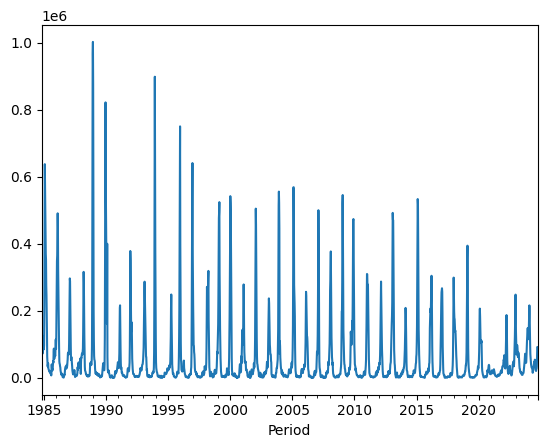

In [75]:
data_sorted['inc'].plot()

Nous allons zoomer sur les derniers années

<Axes: xlabel='Period'>

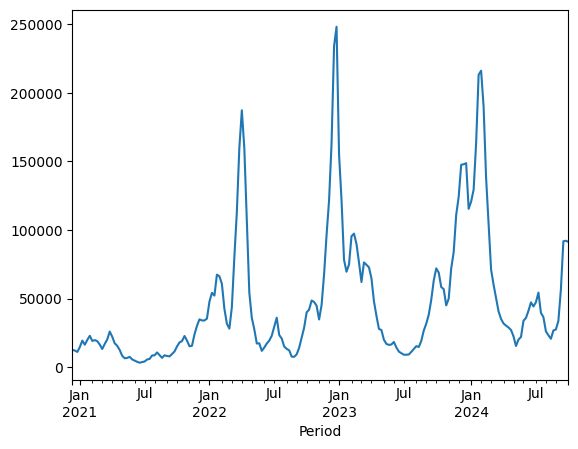

In [76]:
data_sorted['inc'][-200:].plot()

Les pics se trouve en hiver(Vers janvier)

In [92]:
first_year_week = [pd.Period(pd.Timestamp(y,8,1),'W') for y in range(data_sorted.index.year[0],data_sorted.index.year[-1])]
incidence = []
year = []
for week1,week2 in zip(first_year_week[:-1],first_year_week[1:]):
    one_year = data_sorted[week1:week2-1]
    assert len(one_year)-52 < 2 
    incidence.append(one_year['inc'].sum())
    year.append(week2.year)


Maintenant après conversion, nous allons visualiser les données après conversion en des series pandas

In [93]:
incidence_annuelle = pd.Series(data = incidence,index = year)
incidence_annuelle

1985    5762238
1986    5115251
1987    2855570
1988    2765617
1989    5466192
1990    5235827
1991    1659249
1992    2574578
1993    2703886
1994    3514763
1995    1840410
1996    3539413
1997    3620066
1998    3034904
1999    3908112
2000    3826372
2001    2529279
2002    3125418
2003    2234584
2004    3567744
2005    3835025
2006    2307352
2007    2780164
2008    2973918
2009    3444020
2010    4111392
2011    2857040
2012    2175217
2013    4182691
2014    1600941
2015    3654892
2016    2856393
2017    2321583
2018    2705325
2019    2254386
2020    2010315
2021     743449
2022    2060304
2023    2873501
dtype: int64

<Axes: >

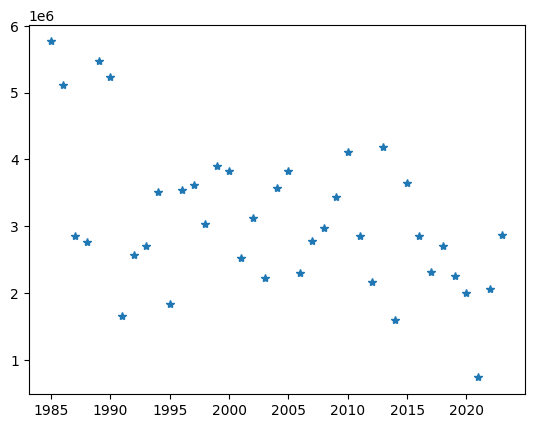

In [95]:
incidence_annuelle.plot(style='*')

Maintenant regardons la distribution des données

<Axes: >

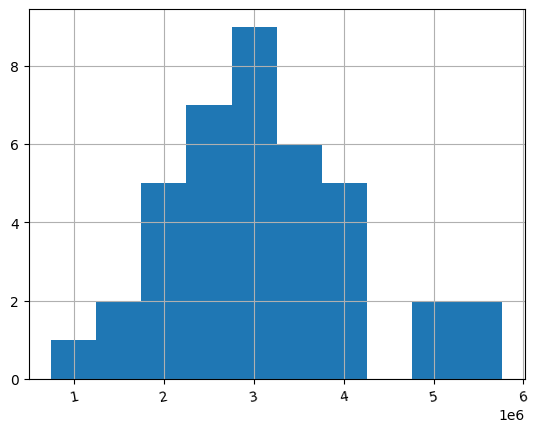

In [99]:
incidence_annuelle.hist(xrot=10)

In [96]:
help(pd.Series.hist)

Help on function hist_series in module pandas.plotting._core:

hist_series(self: 'Series', by=None, ax=None, grid: 'bool' = True, xlabelsize: 'int | None' = None, xrot: 'float | None' = None, ylabelsize: 'int | None' = None, yrot: 'float | None' = None, figsize: 'tuple[int, int] | None' = None, bins: 'int | Sequence[int]' = 10, backend: 'str | None' = None, legend: 'bool' = False, **kwargs)
    Draw histogram of the input series using matplotlib.
    
    Parameters
    ----------
    by : object, optional
        If passed, then used to form histograms for separate groups.
    ax : matplotlib axis object
        If not passed, uses gca().
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels.
    ylabelsize : int, default None
        If specified changes the y-axis label size.
    yrot : float, default None
        Ro